In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
import pandas
import matplotlib.pyplot as plt


In [2]:
df=spark.read.csv('airdata2.csv', inferSchema=True, header=True)

In [27]:
df.show()

+----+-----+---+----+----+----+----+----+---+----+----+------+-----+----+---+----+------------+
|year|month|day|hour|PM25|PM10| SO2| NO2| CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|     station|
+----+-----+---+----+----+----+----+----+---+----+----+------+-----+----+---+----+------------+
|2013|    3|  1|   0| 4.0| 4.0| 4.0| 7.0|300|77.0|-0.7|1023.0|-18.8| 0.0|NNW| 4.4|Aotizhongxin|
|2013|    3|  1|   1| 8.0| 8.0| 4.0| 7.0|300|77.0|-1.1|1023.2|-18.2| 0.0|  N| 4.7|Aotizhongxin|
|2013|    3|  1|   2| 7.0| 7.0| 5.0|10.0|300|73.0|-1.1|1023.5|-18.2| 0.0|NNW| 5.6|Aotizhongxin|
|2013|    3|  1|   3| 6.0| 6.0|11.0|11.0|300|72.0|-1.4|1024.5|-19.4| 0.0| NW| 3.1|Aotizhongxin|
|2013|    3|  1|   4| 3.0| 3.0|12.0|12.0|300|72.0|-2.0|1025.2|-19.5| 0.0|  N| 2.0|Aotizhongxin|
|2013|    3|  1|   5| 5.0| 5.0|18.0|18.0|400|66.0|-2.2|1025.6|-19.6| 0.0|  N| 3.7|Aotizhongxin|
|2013|    3|  1|   6| 3.0| 3.0|18.0|32.0|500|50.0|-2.6|1026.5|-19.1| 0.0|NNE| 2.5|Aotizhongxin|
|2013|    3|  1|   7| 3.0| 6.0|19.0|41.0

In [4]:
dfa=df[df['station']=='Aotizhongxin']
dfa.show()

+----+-----+---+----+----+----+----+----+---+----+----+------+-----+----+---+----+------------+
|year|month|day|hour|PM25|PM10| SO2| NO2| CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|     station|
+----+-----+---+----+----+----+----+----+---+----+----+------+-----+----+---+----+------------+
|2013|    3|  1|   0| 4.0| 4.0| 4.0| 7.0|300|77.0|-0.7|1023.0|-18.8| 0.0|NNW| 4.4|Aotizhongxin|
|2013|    3|  1|   1| 8.0| 8.0| 4.0| 7.0|300|77.0|-1.1|1023.2|-18.2| 0.0|  N| 4.7|Aotizhongxin|
|2013|    3|  1|   2| 7.0| 7.0| 5.0|10.0|300|73.0|-1.1|1023.5|-18.2| 0.0|NNW| 5.6|Aotizhongxin|
|2013|    3|  1|   3| 6.0| 6.0|11.0|11.0|300|72.0|-1.4|1024.5|-19.4| 0.0| NW| 3.1|Aotizhongxin|
|2013|    3|  1|   4| 3.0| 3.0|12.0|12.0|300|72.0|-2.0|1025.2|-19.5| 0.0|  N| 2.0|Aotizhongxin|
|2013|    3|  1|   5| 5.0| 5.0|18.0|18.0|400|66.0|-2.2|1025.6|-19.6| 0.0|  N| 3.7|Aotizhongxin|
|2013|    3|  1|   6| 3.0| 3.0|18.0|32.0|500|50.0|-2.6|1026.5|-19.1| 0.0|NNE| 2.5|Aotizhongxin|
|2013|    3|  1|   7| 3.0| 6.0|19.0|41.0

In [5]:
dfa.count()

35064

In [6]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
dataType=df.dtypes
Schema_dataType=StructType([StructField('Parameters',StringType())\
                           ,StructField('format',StringType())])
dataType=spark.createDataFrame(dataType,schema=Schema_dataType)
dataType.show()

+----------+------+
|Parameters|format|
+----------+------+
|      year|   int|
|     month|   int|
|       day|   int|
|      hour|   int|
|      PM25|double|
|      PM10|double|
|       SO2|double|
|       NO2|double|
|        CO|   int|
|        O3|double|
|      TEMP|double|
|      PRES|double|
|      DEWP|double|
|      RAIN|double|
|        wd|string|
|      WSPM|double|
|   station|string|
+----------+------+



In [28]:
df.groupBy('station').mean('PM25','PM10','SO2','NO2','CO').show()

+-------------+-----------------+------------------+------------------+------------------+------------------+
|      station|        avg(PM25)|         avg(PM10)|          avg(SO2)|          avg(NO2)|           avg(CO)|
+-------------+-----------------+------------------+------------------+------------------+------------------+
|    Changping|71.09974336541265| 94.65787077315701|14.958905587176204| 44.18208550745705|1152.3013445428255|
| Aotizhongxin|82.77361082632768|110.06039131194318|17.375901409358608| 59.30583318645163|1262.9451453977408|
|Wanshouxigong|85.02413582402235|112.22345864661655|17.148603110917286|55.529560136986305|1370.3950306512274|
|       Wanliu|83.37471599100398|110.46461759631974|18.376480570616696| 65.25878926575277|1319.3535125706724|
|       Dongsi|86.19429678848283|110.33674190837705| 18.53110660736606|53.699442802498275|1330.0691310760349|
|       Shunyi|79.49160200286961|  98.7370263066404|13.572038687514805| 43.90886473782605|1187.0639785927142|
| Nongzhan

In [29]:
df.count()

420768

In [9]:
# Drops a row if a value from a particular row is missing. Two rows are dropped.
df25=df.na.drop(subset="PM25")

In [10]:
df25.count()

412029

In [11]:
dfn=df.na.drop(subset=["PM25",'PM10','O3','NO2','CO','SO2'])

In [12]:
dfn.count()

383980

In [3]:
df=df.na.drop()

In [21]:
df.count()

5488

In [73]:
#dfp=dfa.toPandas()

In [15]:
dfA=df[df['station']=='Aotizhongxin']

In [16]:
dfA.count()

31815

In [18]:
dfp=dfA.toPandas()

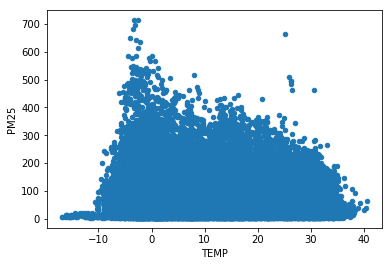

In [19]:
dfp.plot(x='TEMP',y= 'PM25',kind='scatter')

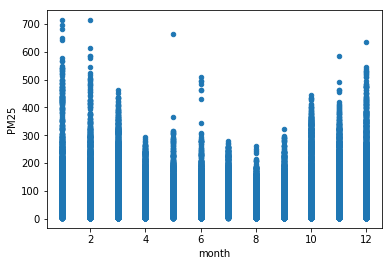

In [21]:
dfp.plot(x='month',y= 'PM25',kind='scatter')

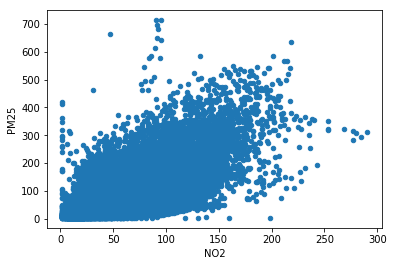

In [22]:
dfp.plot(x='NO2',y= 'PM25',kind='scatter')

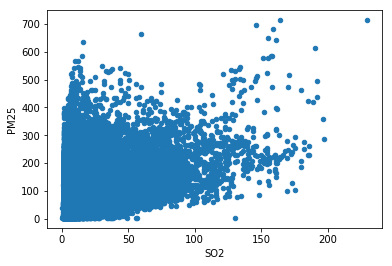

In [37]:
dfp.plot(x='SO2',y= 'PM25',kind='scatter')

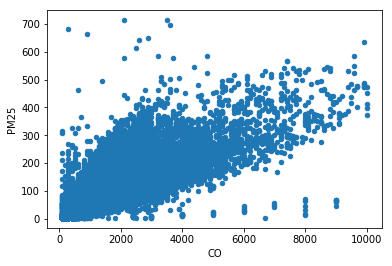

In [39]:
dfp.plot(x='CO',y= 'PM25',kind='scatter')

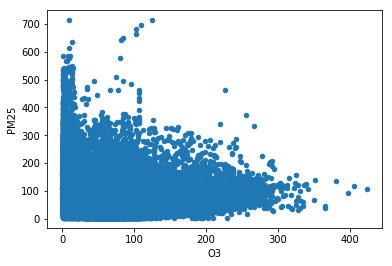

In [40]:
dfp.plot(x='O3',y= 'PM25',kind='scatter')

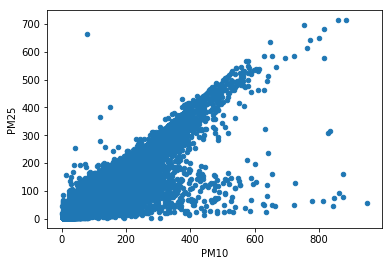

In [41]:
dfp.plot(x='PM10',y= 'PM25',kind='scatter')

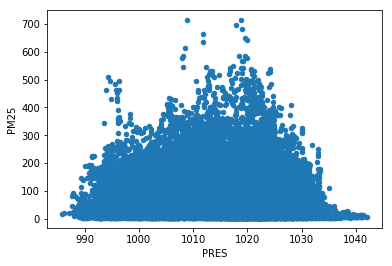

In [42]:
dfp.plot(x='PRES',y= 'PM25',kind='scatter')

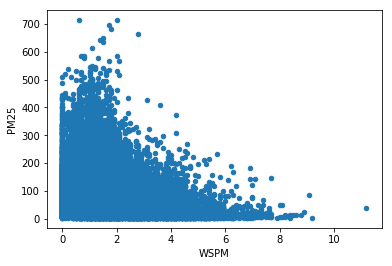

In [43]:
dfp.plot(x='WSPM',y= 'PM25',kind='scatter')

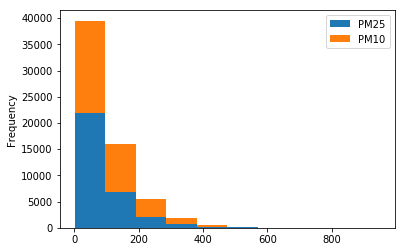

In [62]:
dfp[['PM25','PM10']].plot(kind='hist', stacked=True)

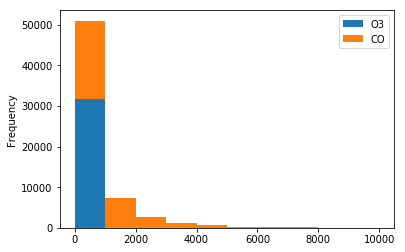

In [64]:
dfp[['O3','CO']].plot(kind='hist', stacked=True)

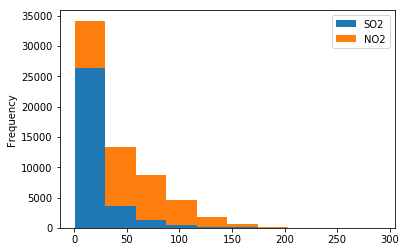

In [65]:
dfp[['SO2','NO2']].plot(kind='hist', stacked=True)

In [68]:
dfp.describe(include='all')

,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815,31815.000000,31815
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,NaN,31815
mean,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,NaN,1.720471,NaN
std,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,NaN,1.204240,NaN
min,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,NaN,0.900000,NaN
50%,2015.000000,6.000000,15.000000,12.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,NaN,1.400000,NaN
75%,2016.000000,9.000000,23.000000,18.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,NaN,2.200000,NaN


In [72]:
df.describe('PM25','PM10','NO2','SO2','O3','CO').show()

+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|summary|             PM25|              PM10|               NO2|               SO2|               O3|                CO|
+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|  count|           382168|            382168|            382168|            382168|           382168|            382168|
|   mean|79.43238314039898|104.57383742228552| 50.57006844345943|15.634813954072515|57.37667572690541|  1229.94056278914|
| stddev|80.15490109533691| 91.37944579945759|35.062085641153246|21.306102815726863| 56.7090126243123|1157.1514763728323|
|    min|              2.0|               2.0|               2.0|            0.2856|           0.2142|               100|
|    max|            844.0|             999.0|             290.0|             500.0|           1071.0|             10000|
+-------+---------------

### consideration outlier to station Aotizhongxin

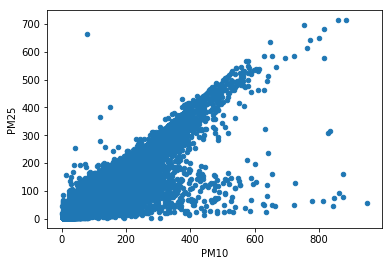

In [25]:
#outliers
dfp.plot(x='PM10',y= 'PM25',kind='scatter')

In [44]:
dfA.count()

31815

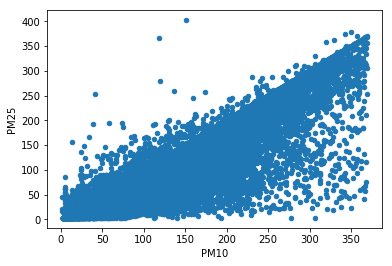

In [42]:
dfpo1=dfA.filter(((dfA['PM25'] < 600) & (dfA['PM10'] < 370)))
dfpo=dfpo1.toPandas()
dfpo.plot(x='PM10',y= 'PM25',kind='scatter')

In [43]:
dfpo1.count()

31224

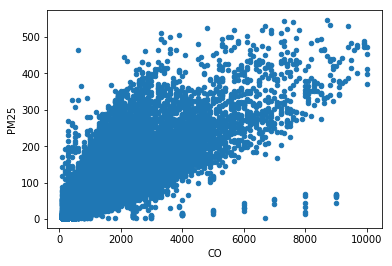

In [37]:
dfpo.plot(x='CO',y= 'PM25',kind='scatter')

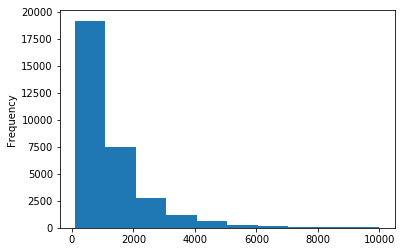

In [38]:
dfpo['CO'].plot(kind='hist')

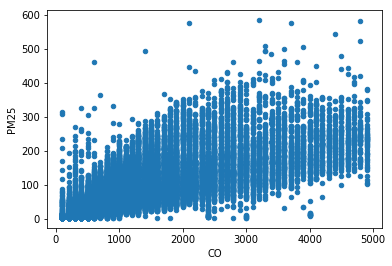

In [39]:
dfpo=dfA.filter(((dfA['PM25'] < 600) & (dfA['CO'] < 5000)))
dfpo=dfpo.toPandas()
dfpo.plot(x='CO',y= 'PM25',kind='scatter')

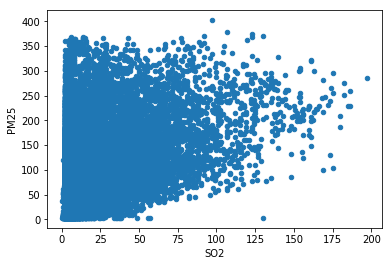

In [202]:
dfpo.plot(x='SO2',y= 'PM25',kind='scatter')

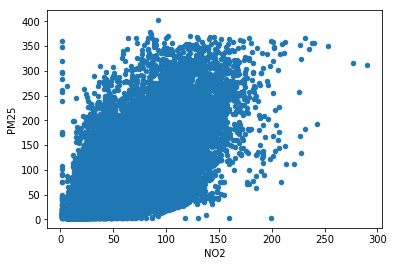

In [203]:
dfpo.plot(x='NO2',y= 'PM25',kind='scatter')

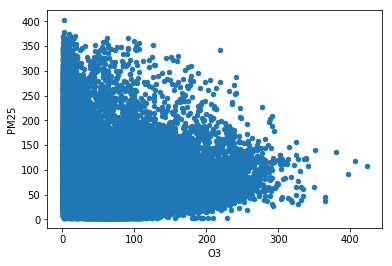

In [206]:
dfpo.plot(x='O3',y= 'PM25',kind='scatter')

### Consideration outlier to all data

In [22]:

#after rmoving the null data
df.count()

5488

In [48]:
df1000=df.filter(df['PM25'] < 100)
df1000.count()

272554

In [49]:
df3000=df.filter((df['PM25'] > 100) & (df['PM25'] < 300))
df3000.count()

99167

In [51]:
df500=df.filter(df['PM25'] > 600)
df500.count()

188

In [31]:
dfn=df.filter(((df['PM25'] < 600) & (df['CO'] < 5000) & (df['PM10'] < 370)&(df['NO2'] >5)))
dfn.count()

361197

In [100]:
#average of AIR POLLUTION properties in each station
dfg=df.groupBy('station').mean('PM25','PM10','SO2','NO2','CO')
dfg.show()

+-------------+-----------------+------------------+------------------+------------------+------------------+
|      station|        avg(PM25)|         avg(PM10)|          avg(SO2)|          avg(NO2)|           avg(CO)|
+-------------+-----------------+------------------+------------------+------------------+------------------+
|    Changping|  70.312328264129| 94.08640188488725|15.061356751629388| 44.31903533857593|1151.7164407453872|
| Aotizhongxin|81.86363036303632|109.12068521137829| 17.16720528052805| 58.97633191890618|1256.5747289014616|
|Wanshouxigong|84.23851013183594|111.91869201660157|17.152568701171877| 55.30718125915527|1362.5316467285156|
|       Wanliu|81.98145851015212|108.76586146112164|17.700088215708004| 64.42928958020501|1293.4501534242997|
|       Dongsi|84.93315643747118|110.99191443074693|16.994465686597668|53.717313985760434| 1316.524391851803|
|       Shunyi|79.40072530966417|  99.3805458038021| 14.14410478903093| 44.83848316221766| 1201.778267205405|
| Nongzhan

In [108]:
#average of CLIMATE properties in each station
dfg2=df.groupBy('station').mean('TEMP','PRES','DEWP','WSPM','pm25')
dfg2.show()

+-------------+------------------+------------------+------------------+------------------+-----------------+
|      station|         avg(TEMP)|         avg(PRES)|         avg(DEWP)|         avg(WSPM)|        avg(pm25)|
+-------------+------------------+------------------+------------------+------------------+-----------------+
|    Changping|13.401676579712658|1007.9940087512003| 1.135298797466421|1.8657568617851341|  70.312328264129|
| Aotizhongxin|13.775610750644972|1011.8003847766261|3.2411063963539273|1.7204714757189838|81.86363036303632|
|Wanshouxigong|13.773187219529774|1011.5600415548229| 2.607440185546893|1.7559844970702887|84.23851013183594|
|       Wanliu|14.020991264246053|1010.7487723336236| 3.831086374616461|1.5029705555918151|81.98145851015212|
|       Dongsi|13.623337899612281|1012.8790166898078|2.2777935262706968|1.8725097237787323|84.93315643747118|
|       Shunyi|12.787636529806317|1013.6480448152555|1.5428727561767166|1.8423064184937326|79.40072530966417|
| Nongzhan

In [191]:
dfgp1=dfg.toPandas()

No handles with labels found to put in legend.


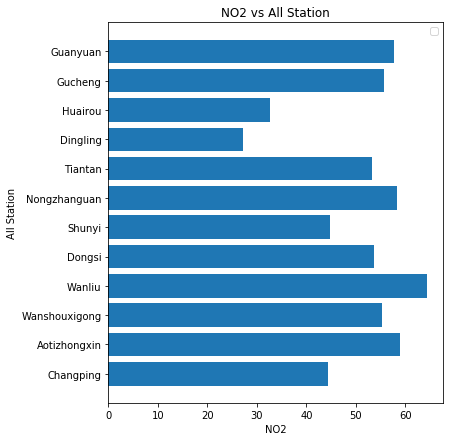

In [195]:
#'NO2 vs selected Station'
fig = plt.figure(figsize = (6, 7))
plt.barh(dfgp1['station'],dfgp1['avg(NO2)'])                                                                  
plt.legend()
plt.title('NO2 vs All Station')
plt.ylabel('All Station')
plt.xlabel('NO2')
plt.show()

No handles with labels found to put in legend.


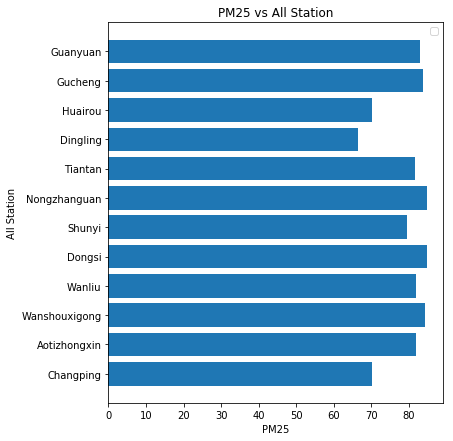

In [197]:
#'NO2 vs selected Station'
fig = plt.figure(figsize = (6, 7))
plt.barh(dfgp1['station'],dfgp1['avg(PM25)'])                                                                  
plt.legend()
plt.title('PM25 vs All Station')
plt.xlabel('PM25')
plt.ylabel('All Station')
plt.show()

No handles with labels found to put in legend.


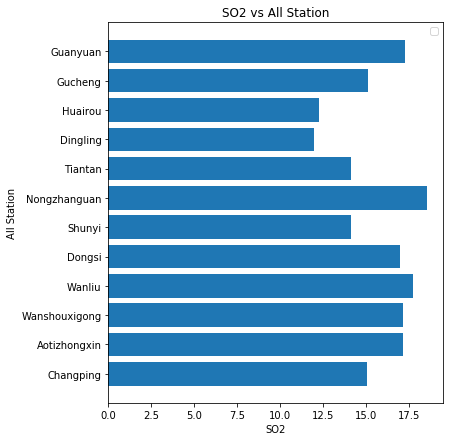

In [201]:
#'SO2 vs selected Station'
fig = plt.figure(figsize = (6, 7))
plt.barh(dfgp1['station'],dfgp1['avg(SO2)'])                                                                  
plt.legend()
plt.title('SO2 vs All Station')
plt.xlabel('SO2')
plt.ylabel('All Station')
plt.show()

In [58]:
dfgp=dfg.toPandas()

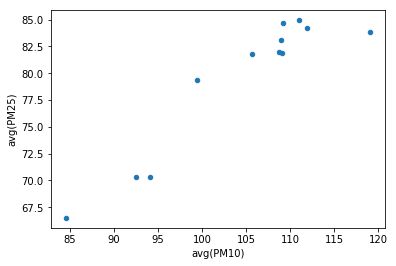

In [65]:
dfgp.plot(x='avg(PM10)',y= 'avg(PM25)',kind='scatter')

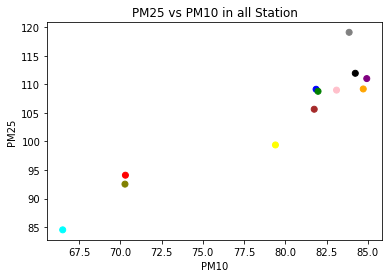

In [104]:
color_dict = { 'Changping':'red', 'Aotizhongxin':'blue', 'Wanshouxigong':'black','Wanliu':'green','Dongsi':'purple','Shunyi':'yellow','Nongzhanguan':'orange','Tiantan':'brown','Dingling':'cyan','Huairou':'olive','Gucheng':'gray','Guanyuan':'pink'}                                                                   
plt.scatter(dfgp['avg(PM25)'],dfgp['avg(PM10)'],color=[color_dict[i] for i in dfgp['station']])                                                                   
plt.legend
plt.title('PM25 vs PM10 in all Station')
plt.ylabel('PM25')
plt.xlabel('PM10')
plt.show()

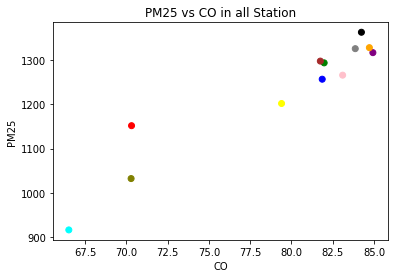

In [105]:
color_dict = { 'Changping':'red', 'Aotizhongxin':'blue', 'Wanshouxigong':'black','Wanliu':'green','Dongsi':'purple','Shunyi':'yellow','Nongzhanguan':'orange','Tiantan':'brown','Dingling':'cyan','Huairou':'olive','Gucheng':'gray','Guanyuan':'pink'}                                                                   
plt.scatter(dfgp['avg(PM25)'],dfgp['avg(CO)'],color=[color_dict[i] for i in dfgp['station']])                                                                   
plt.legend
plt.title('PM25 vs CO in all Station')
plt.ylabel('PM25')
plt.xlabel('CO')
plt.show()

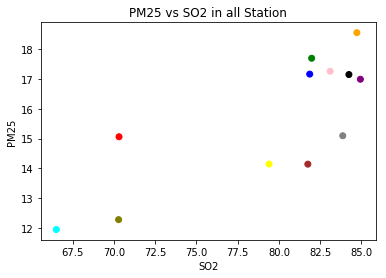

In [106]:
color_dict = { 'Changping':'red', 'Aotizhongxin':'blue', 'Wanshouxigong':'black','Wanliu':'green','Dongsi':'purple','Shunyi':'yellow','Nongzhanguan':'orange','Tiantan':'brown','Dingling':'cyan','Huairou':'olive','Gucheng':'gray','Guanyuan':'pink'}                                                                   
plt.scatter(dfgp['avg(PM25)'],dfgp['avg(SO2)'],color=[color_dict[i] for i in dfgp['station']])                                                                   
plt.legend
plt.title('PM25 vs SO2 in all Station')
plt.ylabel('PM25')
plt.xlabel('SO2')
plt.show()

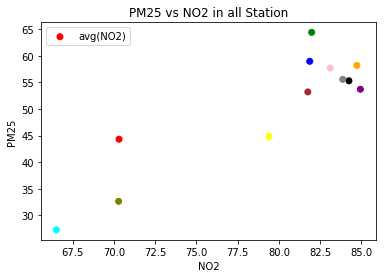

In [149]:
color_dict = { 'Changping':'red', 'Aotizhongxin':'blue', 'Wanshouxigong':'black','Wanliu':'green','Dongsi':'purple','Shunyi':'yellow','Nongzhanguan':'orange','Tiantan':'brown','Dingling':'cyan','Huairou':'olive','Gucheng':'gray','Guanyuan':'pink'}                                                                   
plt.scatter(dfgp['avg(PM25)'],dfgp['avg(NO2)'],color=[color_dict[i] for i in dfgp['station']])                                                                   
plt.legend()
plt.title('PM25 vs NO2 in all Station')
plt.ylabel('PM25')
plt.xlabel('NO2')
plt.show()

In [4]:
dff=df.filter(((df['PM25'] < 600) & (df['CO'] < 5000) & (df['PM10'] < 370)&(df['NO2'] > 5)))
dff.count()

361197

In [5]:
dfx=dff.filter((df['station']=='Aotizhongxin') |(df['station']=='Wanliu') |(df['station']=='Wanshouxigong')| 
               (df['station']=='Dongsi')|(df['station']=='Shunyi')|(df['station']=='Nongzhanguan')|
               (df['station']=='Tiantan')|(df['station']=='Gucheng')
               |(df['station']=='Guanyuan')).select('PM25','PM10','CO','SO2','NO2','O3','TEMP','PRES','DEWP','WSPM','station')
dfx.count()

275296

In [18]:
dfxg=dfx.groupBy('station').mean('PM25','PM10','SO2','NO2','CO','O3')
dfxg.show()


+-------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|      station|        avg(PM25)|         avg(PM10)|          avg(SO2)|          avg(NO2)|           avg(CO)|           avg(O3)|
+-------------+-----------------+------------------+------------------+------------------+------------------+------------------+
| Aotizhongxin|74.87202192638999|100.35584025058732| 16.27717391714636| 56.99160803861565|1133.2509631949883|  57.2239464951397|
|Wanshouxigong|76.17865878200564|101.85097681042757|15.927248702991186| 53.10110530001245|1232.9406483172854| 57.24170375289769|
|       Wanliu|75.03125176692318|100.56396104915973|16.925849483621583| 62.57490663665595|1168.5365792366892|50.498112533890804|
|       Dongsi| 77.7518245061364|100.65843998162367| 17.19145279484736|51.573507603866375|1204.1223009778828| 57.70428521590308|
|       Shunyi|73.47176492867062| 92.47742709253882|13.202548257628846| 43.25336102068608|   1082

In [159]:
dfxp=dfxg.toPandas()

No handles with labels found to put in legend.


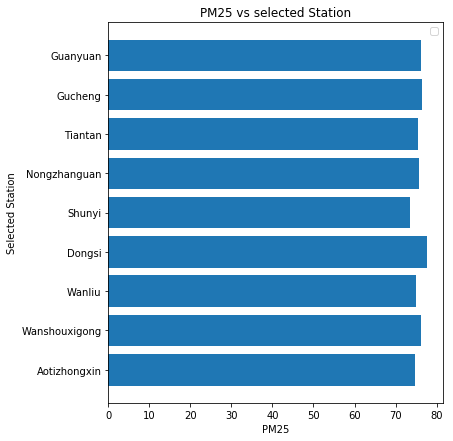

In [198]:
#'PM25 vs selected Station'
fig = plt.figure(figsize = (6, 7))
plt.barh(dfxp['station'],dfxp['avg(PM25)'])                                                                  
plt.legend()
plt.title('PM25 vs selected Station')
plt.xlabel('PM25')
plt.ylabel('Selected Station')
plt.show()

No handles with labels found to put in legend.


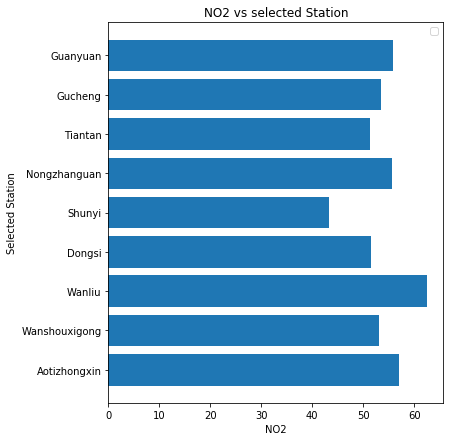

In [200]:
#'NO2 vs selected Station'
fig = plt.figure(figsize = (6, 7))
plt.barh(dfxp['station'],dfxp['avg(NO2)'])                                                                  
plt.legend()
plt.title('NO2 vs selected Station')
plt.xlabel('NO2')
plt.ylabel('Selected Station')
plt.show()

## Machine Learning Section


#### 1. Linear Regression

In [6]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [7]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [17]:
# The input columns are the combination of weather and airpollution parameters column names, and the output column is WP.
assembler_1 = VectorAssembler(
    inputCols=["PM10",'NO2','CO'],outputCol="WP_param")

In [30]:
# The input columns are the only WEATHER parameters column names, and the output column is W
assembler_2 = VectorAssembler(
    inputCols=["TEMP",'DEWP','WSPM'],outputCol="W_param")

In [19]:
# Now that we've created the assembler variable, let's actually transform the data.
output_1 = assembler_1.transform(dfx)

In [31]:
# Now that we've created the assembler variable, let's actually transform the data.
output_2 = assembler_2.transform(dfx)

In [21]:
# Using print schema, you see that the features output column has been added. 
output_1.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output_1.head(1)

root
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- CO: integer (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- WSPM: double (nullable = true)
 |-- station: string (nullable = true)
 |-- WP_param: vector (nullable = true)



[Row(PM25=4.0, PM10=4.0, CO=300, SO2=4.0, NO2=7.0, O3=77.0, TEMP=-0.7, PRES=1023.0, DEWP=-18.8, WSPM=4.4, station='Aotizhongxin', WP_param=DenseVector([4.0, 7.0, 300.0]))]

In [32]:
# Using print schema, you see that the features output column has been added. 
output_2.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output_2.head(1)

root
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- CO: integer (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- WSPM: double (nullable = true)
 |-- station: string (nullable = true)
 |-- W_param: vector (nullable = true)



[Row(PM25=4.0, PM10=4.0, CO=300, SO2=4.0, NO2=7.0, O3=77.0, TEMP=-0.7, PRES=1023.0, DEWP=-18.8, WSPM=4.4, station='Aotizhongxin', W_param=DenseVector([-0.7, -18.8, 4.4]))]

In [23]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data1 = output_1.select("WP_param",'PM25')
final_data1.show()

+-----------------+----+
|         WP_param|PM25|
+-----------------+----+
|  [4.0,7.0,300.0]| 4.0|
|  [8.0,7.0,300.0]| 8.0|
| [7.0,10.0,300.0]| 7.0|
| [6.0,11.0,300.0]| 6.0|
| [3.0,12.0,300.0]| 3.0|
| [5.0,18.0,400.0]| 5.0|
| [3.0,32.0,500.0]| 3.0|
| [6.0,41.0,500.0]| 3.0|
| [6.0,43.0,500.0]| 3.0|
| [8.0,28.0,400.0]| 3.0|
| [6.0,12.0,400.0]| 3.0|
| [6.0,14.0,400.0]| 3.0|
| [6.0,13.0,300.0]| 3.0|
| [6.0,12.0,400.0]| 3.0|
| [9.0,11.0,400.0]| 6.0|
|[15.0,14.0,400.0]| 8.0|
|[19.0,13.0,400.0]| 9.0|
|[23.0,15.0,400.0]|10.0|
|[20.0,20.0,500.0]|11.0|
|[14.0,30.0,500.0]| 8.0|
+-----------------+----+
only showing top 20 rows



In [33]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data2 = output_2.select("W_param",'PM25')
final_data2.show()


+----------------+----+
|         W_param|PM25|
+----------------+----+
|[-0.7,-18.8,4.4]| 4.0|
|[-1.1,-18.2,4.7]| 8.0|
|[-1.1,-18.2,5.6]| 7.0|
|[-1.4,-19.4,3.1]| 6.0|
|[-2.0,-19.5,2.0]| 3.0|
|[-2.2,-19.6,3.7]| 5.0|
|[-2.6,-19.1,2.5]| 3.0|
|[-1.6,-19.1,3.8]| 3.0|
| [0.1,-19.2,4.1]| 3.0|
| [1.2,-19.3,2.6]| 3.0|
| [1.9,-19.4,3.6]| 3.0|
| [2.9,-20.5,3.7]| 3.0|
| [3.9,-19.7,5.1]| 3.0|
| [5.3,-19.3,4.3]| 3.0|
| [6.0,-19.6,4.4]| 6.0|
| [6.2,-18.6,2.8]| 8.0|
| [5.9,-18.1,3.9]| 9.0|
| [4.3,-18.7,2.8]|10.0|
| [3.1,-18.4,2.1]|11.0|
| [2.3,-18.4,2.8]| 8.0|
+----------------+----+
only showing top 20 rows



In [25]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data1,test_data1 = final_data1.randomSplit([0.7,0.3])

In [34]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data2,test_data2 = final_data2.randomSplit([0.7,0.3])

In [35]:
train_data1.describe().show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           192359|
|   mean|75.83131540504995|
| stddev|68.21700786919064|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+



In [45]:
test_data1.describe().show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|            82692|
|   mean|  75.633813428143|
| stddev|68.44003606995318|
|    min|              3.0|
|    max|            500.0|
+-------+-----------------+



In [36]:
train_data2.describe().show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           193017|
|   mean|75.62382795297825|
| stddev|68.07789301756269|
|    min|              2.0|
|    max|            500.0|
+-------+-----------------+



In [37]:
test_data2.describe().show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|            82279|
|   mean|76.10356834672275|
| stddev|68.32090165256585|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+



In [93]:
#train_data2.describe().show()

In [40]:
lr1 = LinearRegression(featuresCol='WP_param',labelCol='PM25', predictionCol='prediction')

In [39]:
lr2 = LinearRegression(featuresCol='W_param',labelCol='PM25', predictionCol='prediction')

In [27]:
#lr = LinearRegression(featuresCol='features', labelCol='label', predictionCol='prediction')

In [41]:
# Fit the model to the data.
lrModel1 = lr1.fit(train_data1)

In [42]:
lrModel2 = lr2.fit(train_data2)

In [43]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel1.coefficients,lrModel1.intercept))

Coefficients: [0.6164245610388981,-0.05804207126361514,0.023295005383808323] Intercept: -10.324458188502936


In [44]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel2.coefficients,lrModel2.intercept))

Coefficients: [-3.4798913796574977,3.1290384705528207,-4.669307334921805] Intercept: 123.20330126827017


In [45]:
# Let's evaluate the model against the test data.
test_results1 = lrModel1.evaluate(test_data1)

In [46]:
# Let's evaluate the model against the test data.
test_results2 = lrModel2.evaluate(test_data2)

In [31]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results1.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results1.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|  12.33657422546621|
|  21.84493830189878|
|-2.2468361742631853|
|  7.825778008877705|
| 14.388498061244887|
|   6.78835950865035|
| 26.079509004186594|
|  6.461112244385777|
| 20.188220956055815|
| 28.149272401487323|
| 10.185788815899881|
|   16.2945007677691|
|  49.18467740724297|
|  45.09290293108101|
| 20.419038786688667|
| 11.800642026887854|
| 48.909353978757075|
| 13.599044190199757|
| 20.106296857975416|
|  4.920336634251603|
+-------------------+
only showing top 20 rows

RSME: 28.721638332862103


In [47]:
# We can also get the R2 value. 
print("R2: {}".format(test_results1.r2))

R2: 0.8260861373906984


In [48]:
# We can also get the R2 value. 
print("R2: {}".format(test_results2.r2))

R2: 0.17639858213717785


In [33]:
final_data1.describe().show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           281640|
|   mean|76.02102861809402|
| stddev|68.19336731301983|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+



##### But what if we didn't have the predictor data?

In [34]:
# Let's just select the features column (removing the label column).
unlabeled_data1 = test_data1.select('WP_param')
unlabeled_data1.show()

+-----------------+
|         WP_param|
+-----------------+
|  [2.0,8.0,400.0]|
|  [2.0,9.0,900.0]|
|[2.0,13.0,1000.0]|
| [2.0,17.0,400.0]|
| [2.0,19.0,900.0]|
| [2.0,22.0,500.0]|
| [2.0,23.0,100.0]|
| [2.0,23.0,300.0]|
| [2.0,25.0,100.0]|
|[2.0,29.0,1800.0]|
| [2.0,35.0,600.0]|
| [2.0,37.0,600.0]|
| [2.0,42.0,400.0]|
| [2.0,46.0,500.0]|
| [2.0,52.0,500.0]|
| [2.0,52.0,700.0]|
| [2.0,54.0,700.0]|
| [2.0,61.0,600.0]|
| [2.0,69.0,900.0]|
|  [3.0,6.0,300.0]|
+-----------------+
only showing top 20 rows



In [35]:
predictions1 = lrModel1.transform(unlabeled_data1)

In [36]:
# It worked! Feeding the unlabeled data features into the model results in a prediction, 
# which is the amount someone with those features is likely to spend in a year.
predictions1.show()
predictions1.head(1)

+-----------------+--------------------+
|         WP_param|          prediction|
+-----------------+--------------------+
|  [2.0,8.0,400.0]|-0.33657422546620985|
|  [2.0,9.0,900.0]|   11.15506169810122|
|[2.0,13.0,1000.0]|  13.246836174263185|
| [2.0,17.0,400.0]| -0.8257780088777054|
| [2.0,19.0,900.0]|  10.611501938755113|
| [2.0,22.0,500.0]|    1.21164049134965|
| [2.0,23.0,100.0]|  -8.079509004186594|
| [2.0,23.0,300.0]| -3.4611122443857774|
| [2.0,25.0,100.0]|  -8.188220956055815|
|[2.0,29.0,1800.0]|  30.850727598512677|
| [2.0,35.0,600.0]|  2.8142111841001185|
| [2.0,37.0,600.0]|  2.7054992322308973|
| [2.0,42.0,400.0]| -2.1846774072429707|
| [2.0,46.0,500.0]|-0.09290293108100478|
| [2.0,52.0,500.0]|-0.41903878668866845|
| [2.0,52.0,700.0]|   4.199357973112146|
| [2.0,54.0,700.0]|   4.090646021242925|
| [2.0,61.0,600.0]|  1.4009558098002426|
| [2.0,69.0,900.0]|   7.893703142024583|
|  [3.0,6.0,300.0]|  -1.920336634251603|
+-----------------+--------------------+
only showing top

[Row(WP_param=DenseVector([2.0, 8.0, 400.0]), prediction=-0.33657422546620985)]

In [110]:
# The input columns are the combination of weather and airpollution parameters column names, and the output column is WP.
assembler_tt = VectorAssembler(
    inputCols=["PM10"],outputCol="WP_paramtt")
# Now that we've created the assembler variable, let's actually transform the data.
output_tt = assembler_tt.transform(dfx)
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data_tt = output_tt.select("WP_paramtt",'PM25')
final_data_tt.show()
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data_tt,test_data_tt = final_data_tt.randomSplit([0.7,0.3])

+----------+----+
|WP_paramtt|PM25|
+----------+----+
|     [4.0]| 4.0|
|     [8.0]| 8.0|
|     [7.0]| 7.0|
|     [6.0]| 6.0|
|     [3.0]| 3.0|
|     [5.0]| 5.0|
|     [3.0]| 3.0|
|     [6.0]| 3.0|
|     [6.0]| 3.0|
|     [8.0]| 3.0|
|     [6.0]| 3.0|
|     [6.0]| 3.0|
|     [6.0]| 3.0|
|     [6.0]| 3.0|
|     [9.0]| 6.0|
|    [15.0]| 8.0|
|    [19.0]| 9.0|
|    [23.0]|10.0|
|    [20.0]|11.0|
|    [14.0]| 8.0|
+----------+----+
only showing top 20 rows



In [13]:
from pyspark.ml.regression import GeneralizedLinearRegression


In [57]:
glr = GeneralizedLinearRegression(family="gaussian", link="identity", 
                                  featuresCol='WP_param',labelCol='PM25', maxIter=35, regParam=0.1)

In [58]:
# Fit the model
modelg = glr.fit(train_data1)


In [113]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(modelg.coefficients,modelg.intercept))

Coefficients: [0.7885390166522013] Intercept: -3.413685459006731


In [85]:
# Let's evaluate the model against the test data.
test_resultsg = modelg.evaluate(test_data1)

In [91]:
summary = modelg.summary
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))

Coefficient Standard Errors: [0.0012266662914573964, 0.0028554629513144916, 0.00010742720716598135, 0.12654479144903727]
T Values: [501.50991456021757, -18.14502384404713, 214.8757591541405, -81.74633020407936]


In [53]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [61]:
# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [3,4,4,2]

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=10, layers=layers,featuresCol='p1',labelCol='PM25')

In [70]:
# train the model
#model = trainer.fit(train_datap1)

## Patterns

### Pattern_1


In [52]:
assembler_p1 = VectorAssembler(inputCols=['PM10','CO','SO2','NO2','O3','TEMP','PRES','DEWP','WSPM'],outputCol="p1")
output_p1 = assembler_p1.transform(dfx)
final_datap1 = output_p1.select("p1",'PM25')
train_datap1,test_datap1 = final_datap1.randomSplit([0.7,0.3])
train_datap1.describe().show()
lrp1 = LinearRegression(featuresCol='p1',labelCol='PM25', predictionCol='prediction')
lrmp1 = lrp1.fit(train_datap1)
print("Coefficients: {} Intercept: {}".format(lrmp1.coefficients,lrmp1.intercept))
test_resultsp1 = lrmp1.evaluate(test_datap1)
print("R2: {}".format(test_resultsp1.r2))

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           193136|
|   mean|75.88223894043576|
| stddev|68.20709324114831|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+

Coefficients: [0.5930194067555453,0.020409177514042746,0.08846813728806564,-0.009997742390691908,0.07755930324190029,-0.8494709426465086,0.5043712463841379,1.285755438405562,0.3494120592287339] Intercept: -515.7288581617388
R2: 0.8410966573857191


### Pattern_2

In [64]:
assembler_p2 = VectorAssembler(inputCols=['TEMP','PRES','DEWP','WSPM'],outputCol="p2")
output_p2 = assembler_p2.transform(dfx)
final_datap2 = output_p2.select("p2",'PM25')
train_datap2,test_datap2 = final_datap2.randomSplit([0.7,0.3])
train_datap2.describe().show()
lrp2 = LinearRegression(featuresCol='p2',labelCol='PM25', predictionCol='prediction')
lrmp2 = lrp2.fit(train_datap2)
print("Coefficients: {} Intercept: {}".format(lrmp2.coefficients,lrmp2.intercept))
test_resultsp2 = lrmp2.evaluate(test_datap2)
print("R2: {}".format(test_resultsp2.r2))

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           193305|
|   mean|75.81689299293862|
| stddev|68.20233112735626|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+

Coefficients: [-4.004953756066763,-0.878889578825513,2.980096150714659,-4.45676590600118] Intercept: 1020.0014358269831
R2: 0.18034889045880564


### Pattern_3

In [66]:
assembler_p3 = VectorAssembler(inputCols=['PM10','CO','NO2'],outputCol="p3")
output_p3 = assembler_p3.transform(dfx)
final_datap3 = output_p3.select("p3",'PM25')
train_datap3,test_datap3 = final_datap3.randomSplit([0.7,0.3])
train_datap3.describe().show()
lrp3 = LinearRegression(featuresCol='p3',labelCol='PM25', predictionCol='prediction')
lrmp3 = lrp3.fit(train_datap3)
print("Coefficients: {} Intercept: {}".format(lrmp3.coefficients,lrmp3.intercept))
test_resultsp3 = lrmp3.evaluate(test_datap3)
print("R2: {}".format(test_resultsp3.r2))

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           192395|
|   mean|75.75037656903767|
| stddev|68.13701926551883|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+

Coefficients: [0.6164904299360052,0.023202176464616465,-0.05745303757894935] Intercept: -10.31595002201292
R2: 0.8259475495863826


### Pattern_4

In [67]:
from pyspark.ml.regression import GeneralizedLinearRegression
glrp4 = GeneralizedLinearRegression(family="gaussian", link="identity", 
                                  featuresCol='p1',labelCol='PM25', maxIter=35, regParam=0.1)
modelgp4 = glrp4.fit(train_datap1)
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(modelgp4.coefficients,modelgp4.intercept))

Coefficients: [0.5913211152370109,0.020457530846716712,0.08877271241006764,-0.007655959048426637,0.07717399940523513,-0.833509021101247,0.5014112920773154,1.2728171004654327,0.3264498850705968] Intercept: -512.8757115208211


### Pattern_5

In [69]:
from pyspark.ml.regression import GeneralizedLinearRegression
glrp5 = GeneralizedLinearRegression(family="gaussian", link="identity", 
                                  featuresCol='p3',labelCol='PM25', maxIter=35, regParam=0.1)
modelgp5 = glrp5.fit(train_datap3)
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(modelgp5.coefficients,modelgp5.intercept))

Coefficients: [0.6149534486300937,0.02319370336792773,-0.05490622500086525] Intercept: -10.289015841490734


### Pattern_investigation

In [72]:
assembler_pv = VectorAssembler(inputCols=['PM10','NO2'],outputCol="pv")
output_pv = assembler_pv.transform(dfx)
final_datapv = output_pv.select("pv",'PM25')
train_datapv,test_datapv = final_datapv.randomSplit([0.7,0.3])
train_datapv.describe().show()
lrpv = LinearRegression(featuresCol='pv',labelCol='PM25', predictionCol='prediction')
lrmpv = lrpv.fit(train_datapv)
print("Coefficients: {} Intercept: {}".format(lrmpv.coefficients,lrmpv.intercept))
test_resultspv = lrmpv.evaluate(test_datapv)
print("R2: {}".format(test_resultspv.r2))

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|           192540|
|   mean| 75.7574010595201|
| stddev|68.05294714621544|
|    min|              2.0|
|    max|            533.0|
+-------+-----------------+

Coefficients: [0.73141578757579,0.20753770186965992] Intercept: -8.930164413505402
R2: 0.783020957549277
